# Generating random variables from scratch

## Dr. Tirthajyoti Sarkar, Fremont, CA, May 2020

---

## What is Notebook about?

[Random variables](https://en.wikipedia.org/wiki/Random_variable) are an integral part of data science, machine learning, and statistical modeling. They play an increasingly important role in the systems and services around us that employ artificial intelligence or deep neural networks.

The concept and properties of random variables are used in

- regression techniques,
- ensemble methods like random forests, gradient boosting,
- deep learning,
- clustering algorithms,
- natural language processing,
- reinforcement learning,
- advanced search algorithms in AI and game theory.

This Notebook aims to show how you can generate random variables from scratch with simple programming.

Note that phrase _“from scratch”_. It means we will not call a third-party library or subroutine. Instead, we will write our own simple functions to generate such random variables.

**Can you do the following?**

- Addition, multiplication, division, and modulus
- Sine, cosine, and logarithm operations

We will show how to use these rudimentary mathematical operations to generate,

- Uniform random variates
- Random variates from the Exponential Distribution
- Random variates from the Normal Distribution
- etc.

## In software, you gotta embrace the ‘Pseudo’

Mother nature offers numerous instances of true random processes. Nuclear decay is one such instance.

It turns out that true random processes can only be emulated and modeled with the so-called [hardware random generators](https://en.wikipedia.org/wiki/Hardware_random_number_generator), a device that generates random numbers from a physical process, rather than by means of an algorithm. Such devices are often based on quantum-mechanical phenomena that generate low-level, stochastic “noise” signals, such as thermal noise, the photoelectric effect, interference of optical beams, and other quantum phenomena.

Unfortunately, in everyday computing systems, and in an algorithmic setting, we only encounter the so-called [‘pseudo-random’ numbers](https://en.wikipedia.org/wiki/Pseudorandom_number_generator). They are not truly random as a natural process can be, and at some level, they are deterministic. A [seed number is supplied to an algorithm](https://pynative.com/python-random-seed/), which generates a series of such numbers.

However, for all practical computing purposes, these ‘pseudo-random’ numbers are sufficient if they do not exhibit an obvious repeating pattern or predictability.

Complex and elaborate pseudo-random generators are available in all major programming languages. In many cases, they use special types of mathematics such as [Modular Arithmetic](https://en.wikipedia.org/wiki/Modular_arithmetic) or [Marsenne Twister](https://en.wikipedia.org/wiki/Mersenne_Twister). Here is the link to the [`random` module of Python](https://docs.python.org/3/library/random.html), for example.

There is also a wholly separate branch of research and development around [cryptographically secured pseudo random generators](https://en.wikipedia.org/wiki/Cryptographically_secure_pseudorandom_number_generator) for encryption systems. Imagine what can happen if someone can guess or tease out the exact algorithm for generating the hash keys for your Google password?

In this Notebook, we will write a very simple program with the help of rudimentary mathematical operations, to build our random generator. In fact, we will use a method called a [linear congruential generator](https://en.wikipedia.org/wiki/Linear_congruential_generator), which was popular in the old days of pseudo-random generation.

The output of our program will take the form of a simple [Uniform Distribution](https://en.wikipedia.org/wiki/Uniform_distribution_(continuous)). Thereafter, we will use statistical theorems and transformations to generate random variables, corresponding to other distributions, based on this random generator.

## Article

Read my article on Medium on this topic here: ["How to generate random variables from scratch (no library used)"](https://towardsdatascience.com/how-to-generate-random-variables-from-scratch-no-library-used-4b71eb3c8dc7)

---


## The code and the demo

### Uniform random generator based on _"Linear Congruential Generator"_

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from collections import Counter
import time

In [2]:
def pseudo_uniform_bad(mult=5,
                       mod=11,
                       seed=1,
                       size=1):
    """
    A bad pseudo random generator with small multipliers and modulus
    """
    U = np.zeros(size)
    x = (seed*mult+1)%mod
    U[0] = x/mod
    for i in range(1,size):
        x = (x*mult+1)%mod
        U[i] = x/mod
    return U

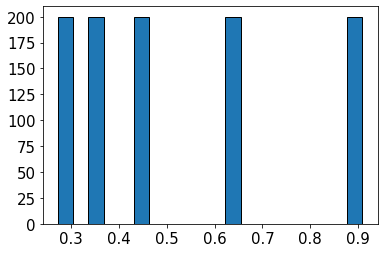

In [3]:
l=pseudo_uniform_bad(seed=3,size=1000)
plt.hist(l,bins=20,edgecolor='k')
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.show()

In [4]:
def pseudo_uniform_good(mult=16807,
                        mod=(2**31)-1,
                        seed=123456789,
                        size=1):
    """
    A reasoanbly good pseudo random generator
    """
    U = np.zeros(size)
    x = (seed*mult+1)%mod
    U[0] = x/mod
    for i in range(1,size):
        x = (x*mult+1)%mod
        U[i] = x/mod
    return U

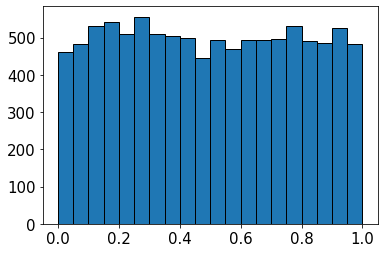

In [5]:
l=pseudo_uniform_good(size=10000)
plt.hist(l,bins=20,edgecolor='k')
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.show()

In [6]:
def pseudo_uniform(low=0,
                   high=1,
                  seed=123456789,
                  size=1):
    """
    Generates uniformly random number between `low` and `high` limits
    """
    return low+(high-low)*pseudo_uniform_good(seed=seed,size=size)

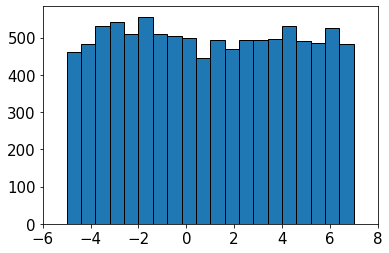

In [7]:
l=pseudo_uniform(low=-5,high=7,size=10000)
plt.hist(l,bins=20,edgecolor='k')
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.xlim(-6,8)
plt.show()

### Sample picker

In [8]:
def sample_pick(lst):
    """
    Picks up a random sample from a given list
    """
    # Sets seed based on the decimal portion of the current system clock
    t = time.perf_counter()
    seed = int(10**9*float(str(t-int(t))[0:]))
    # Random sample as an index
    l = len(lst)
    s = pseudo_uniform(low=0,high=l,seed=seed,size=1)
    idx = int(s)
    
    return (lst[idx])

In [9]:
dice_faces = ['one','two','three','four','five','six']

In [10]:
for _ in range(30):
    print(sample_pick(dice_faces),end=', ')

four, one, two, three, four, five, five, six, one, three, five, six, one, two, four, five, six, one, one, two, four, five, one, three, four, six, one, three, four, six, 

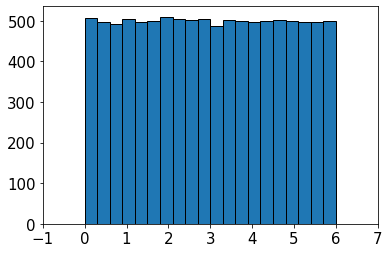

In [11]:
l = []
for _ in range(10000):
    t = time.perf_counter()
    seed = int(10**9*float(str(t-int(t))[0:]))
    l.append(float(pseudo_uniform(0,6,seed=seed,size=1)))
    
plt.hist(l,bins=20,edgecolor='k')
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.xlim(-1,7)
plt.show()

### Bernoulli

In [12]:
def pseudo_bernoulli(p=0.5,size=1):
    """
    Bernoulli generator from uniform generator
    """
    # Sets seed based on the decimal portion of the current system clock
    t = time.perf_counter()
    seed = int(10**9*float(str(t-int(t))[0:]))
    B = pseudo_uniform(seed=seed,size=size)
    B = (B<=p).astype(int)
    
    return B

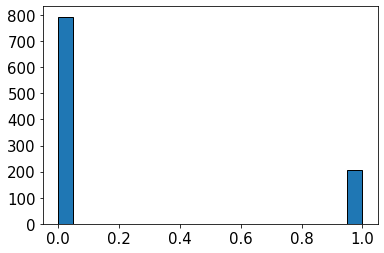

In [13]:
l=pseudo_bernoulli(p=0.2,size=1000)
plt.hist(l,bins=20,edgecolor='k')
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.show()

### Binomial

In [14]:
def pseudo_binomial(n=100,
                   p=0.5,
                   size=1):
    """
    Binomial distribution from the Uniform generator
    """
    binom = []
    for _ in range(size):
        t = time.perf_counter()
        seed = int(10**9*float(str(t-int(t))[0:]))
        U = pseudo_uniform(size=n,seed=seed)
        Y = (U <= p).astype(int)
        binom.append(np.sum(Y))
    
    return binom

In [15]:
# 100 loaded coins, each with probability of head 0.75, are flipped 
# This trial/experiment is repeated for 15 times
# The number of heads in each experiment are given below
pseudo_binomial(n=100,p=0.75,size=15)

[69, 74, 75, 72, 80, 75, 69, 78, 79, 84, 75, 83, 83, 63, 68]

### Normal

In [16]:
def pseudo_normal(mu=0.0,sigma=1.0,size=1):
    """
    Generates Normal distribution from the Uniform distribution using Box-Muller transform
    """
    # A pair of Uniform distributions
    t = time.perf_counter()
    seed1 = int(10**9*float(str(t-int(t))[0:]))
    U1 = pseudo_uniform(seed=seed1,size=size)
    t = time.perf_counter()
    seed2 = int(10**9*float(str(t-int(t))[0:]))
    U2 = pseudo_uniform(seed=seed2,size=size)
    # Standard Normal pair
    Z0 = np.sqrt(-2*np.log(U1))*np.cos(2*np.pi*U2)
    Z1 = np.sqrt(-2*np.log(U1))*np.sin(2*np.pi*U2)
    # Scaling
    Z0 = Z0*sigma+mu
    
    return Z0

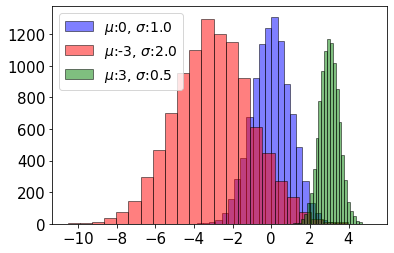

In [17]:
l1=pseudo_normal(size=10000)
plt.hist(l1,bins=25,edgecolor='k',alpha=0.5,color='blue')
l2=pseudo_normal(mu=-3,sigma=2.0,size=10000)
plt.hist(l2,bins=25,edgecolor='k',alpha=0.5,color='red')
l3=pseudo_normal(mu=3,sigma=0.5,size=10000)
plt.hist(l3,bins=25,edgecolor='k',alpha=0.5,color='green')

plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.legend(["$\mu$:0, $\sigma$:1.0",
           "$\mu$:-3, $\sigma$:2.0",
           "$\mu$:3, $\sigma$:0.5"],fontsize=14)
plt.show()

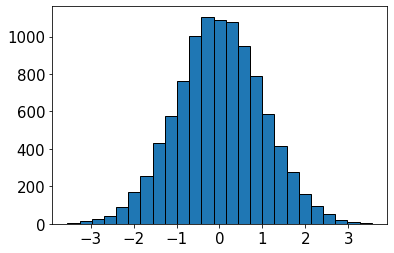

In [18]:
l=pseudo_normal(size=10000)
plt.hist(l,bins=25,edgecolor='k')
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.show()

### Exponential

In [19]:
def pseudo_exp(lamb,size=1):
    """
    Generates exponential distribution from the Uniform distribution
    """
    t = time.perf_counter()
    seed = int(10**9*float(str(t-int(t))[0:]))
    U = pseudo_uniform(size=size,seed=seed)
    X = -(1/lamb)*(np.log(1-U))
    
    return X

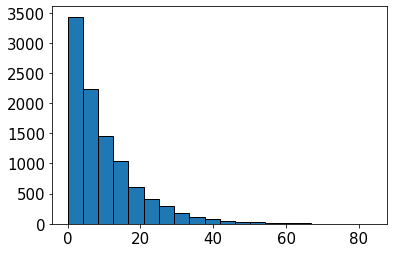

In [20]:
l=pseudo_exp(lamb=0.1,size=10000)
plt.hist(l,bins=20,edgecolor='k')
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.show()

### Poisson

In [21]:
def pseudo_poisson(alpha,size=1):
    """
    """
    poisson = []
    for _ in range(size):
        t = time.perf_counter()
        seed = int(10**9*float(str(t-int(t))[0:]))
        U = pseudo_uniform(seed=seed,size=5*alpha)
        X,P,i = 0,1,0
        while P >= np.exp(-alpha):
            P = U[i]*P
            X+=1
            i+=1
        poisson.append(X)
    return np.array(poisson)

In [22]:
l1=pseudo_poisson(alpha=5,size=10000)
l2=pseudo_poisson(alpha=10,size=10000)
l3=pseudo_poisson(alpha=20,size=10000)

d1=dict(Counter(l1))
d2=dict(Counter(l2))
d3=dict(Counter(l3))

k1 = [k for k in d1.keys()]
v1 = [v for v in d1.values()]
k2 = [k for k in d2.keys()]
v2 = [v for v in d2.values()]
k3 = [k for k in d3.keys()]
v3 = [v for v in d3.values()]

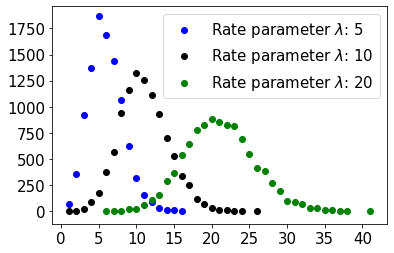

In [23]:
plt.scatter(k1,v1,c='blue')
plt.scatter(k2,v2,c='k')
plt.scatter(k3,v3,c='green')
plt.legend(["Rate parameter "+"$\lambda$: "+str(i) for i in (5,10,20)],fontsize=15)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.show()